In [7]:
import numpy as np
import cv2

## Load sample images of skimage

skimage is an image processing libary from sci-kit family of packages. We will use some images provided by skimage.

In [8]:
from skimage import data

In [9]:
#from skimage.color import rgb2gray
#from skimage import img_as_ubyte,img_as_float

cat = data.chelsea() # take the test image of cat!
astro = data.astronaut()

In [4]:
cat.shape

(300, 451, 3)

In [5]:
cat.dtype

dtype('uint8')

## check image (or display image)

Orignal method

* cv2.imshow("cat_iamge",cat)

The alternative method for google colab

* cv2_imshow(cat)

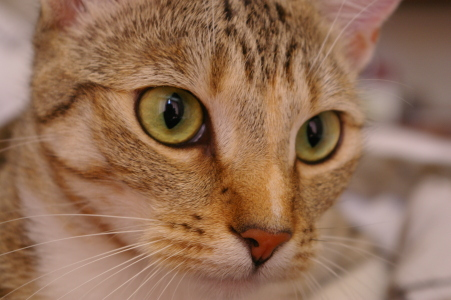

In [19]:
from google.colab.patches import cv2_imshow

cv2_imshow(cat[:, :, ::-1])

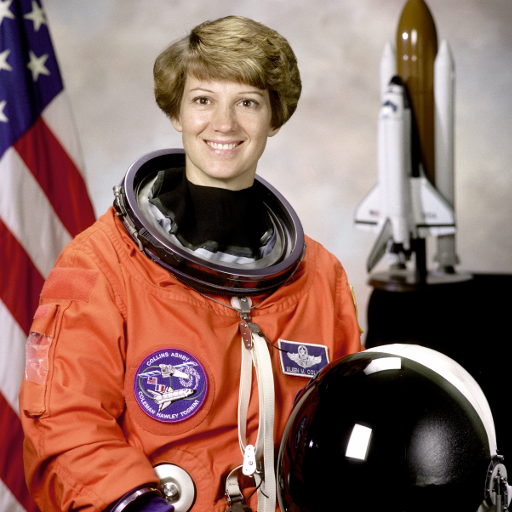

In [20]:
cv2_imshow(astro[:, :, ::-1])

In [ ]:
cv2.imshow('test_astro',astro)
cv2.waitKey(0)
cv2.destroyAllWindows()
# for google colab
#cv2_imshow(cat)
#cv2_imshow(astro)

We can see something wrong.

It's because opencv uses BGR color space but skimage uses RGB. To show a proper image color, we should change the color space

## Change the Color Space

opencv provides cvtColor method to covert the color space of image.

* cv2.COLOR_BGR2RGB
* cv2.COLOR_RGB2BGR
* cv2.COLOR_HSV2BGR
* cv2.COLOR_RGB2YUV
* cv2.COLOR_RGB2GRAY

In [8]:
cv2.COLOR_BGR2RGB
cv2.COLOR_RGB2BGR
cv2.COLOR_HSV2BGR
cv2.COLOR_RGB2YUV

83

In [ ]:
cat_cv = cv2.cvtColor(cat,cv2.COLOR_RGB2BGR)
astro_cv = cv2.cvtColor(astro,cv2.COLOR_RGB2BGR)
gray_cat = cv2.cvtColor(cat,cv2.COLOR_RGB2GRAY)


cv2.imshow('cat_cv',cat_cv)
cv2.imshow('astro_cv',astro_cv)
cv2.imshow('gray_cat',gray_cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

# for google colab
# cv2_imshow(cat_cv)
# cv2_imshow(astro_cv)
# cv2_imshow(gray_cat)

## Save an image

* cv2.imwrite('file_name', img)

In [12]:
cv2.imwrite?

In [ ]:
cv2.imwrite("cat_cv.tif",cat_cv)
cv2.imwrite("astro_cv.bmp",astro_cv)


True

# Read an image

* Use the function `cv2.imread()` to read an image. 
* The image should be in the working directory or a full path of image should be given.

Second argument is flag which specifies the way image should be read.

* cv2.IMREAD_COLOR : Loads a color image. Any tranparency of image will be neglected. It is the default flag. (1)
* cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode (0)
* cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel (-1)

In [10]:
cv2.imread?

In [11]:
# Load an color image in grayscale
#img = cv2.imread("cat_cv.tif",0) # Even if the image path is wrong, it won't throw any error
img = cat
print(img) # If the image path is wrong, img will be None

new_cat_cv   = cv2.imread("cat_cv.tif")
new_astro_cv = cv2.imread("astro_cv.bmp")

"""cv2.imshow('new_cat_cv',new_cat_cv)
cv2.imshow('new_astro_cv',new_astro_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()"""

# for google colab 
# cv2_imshow(new_cat_cv)
# cv2_imshow(new_astro_cv)

[[[143 120 104]
  [143 120 104]
  [141 118 102]
  ...
  [ 45  27  13]
  [ 45  27  13]
  [ 45  27  13]]

 [[146 123 107]
  [145 122 106]
  [143 120 104]
  ...
  [ 46  29  13]
  [ 45  29  13]
  [ 47  30  14]]

 [[148 126 112]
  [147 125 111]
  [146 122 109]
  ...
  [ 48  28  17]
  [ 49  29  18]
  [ 50  30  19]]

 ...

 [[ 92  58  30]
  [105  71  43]
  [132  98  71]
  ...
  [172 145 138]
  [172 145 138]
  [172 145 138]]

 [[128  92  60]
  [139 103  71]
  [134  95  64]
  ...
  [166 142 132]
  [166 142 132]
  [167 143 133]]

 [[139 103  71]
  [127  88  57]
  [125  86  53]
  ...
  [161 137 127]
  [161 137 127]
  [162 138 128]]]


"cv2.imshow('new_cat_cv',new_cat_cv)\ncv2.imshow('new_astro_cv',new_astro_cv)\ncv2.waitKey(0)\ncv2.destroyAllWindows()"

In [12]:
img.shape

(300, 451, 3)

# Using Matplotlib

* **Matplotlib** is a plotting library for Python which gives you wide variety of plotting methods. 
* You will see them in coming articles. : Ref.(https://matplotlib.org/api/pyplot_api.html)
* Here, you will learn how to display image with Matplotlib. You can zoom images, save it etc using Matplotlib.

In [5]:
from matplotlib import pyplot as plt

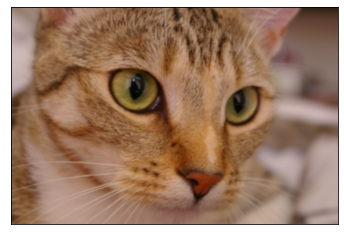

In [13]:
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

### Warning

Color image loaded by OpenCV is in **BGR** mode. But *Matplotlib* displays in **RGB** mode. So color images will no be displayed correctly in *Matplotlib* if image is read with OpenCV.

* There is a slight difference in pixel ordering in *OpenCV* and *Matplotlib*.

So when you display an image loaded in *OpenCV* using python, you may need to convert it into **RGB** mode. Below method demonstrate it:

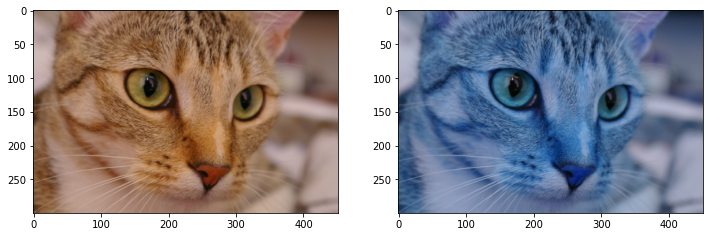

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cat

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.

plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(img)  # expects distored color
plt.subplot(122); plt.imshow(img2) # expects true color
plt.show()

#cv2.imshow('bgr imgae',img) #expects true color
#cv2.imshow('rgb image',img2) #expects disroted color
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Gray scale

모든 색이 단일 채널에 의해 표현된다.
* 0 : black
* max : white

intensity (brightness)과 pixel의 value임.

In [15]:
import cv2
from skimage import data
#from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float

cat = data.chelsea() # take the test image of cat!

cat_cv = cv2.cvtColor(cat,cv2.COLOR_RGB2BGR)
gray_cat = cv2.cvtColor(cat,cv2.COLOR_RGB2GRAY)

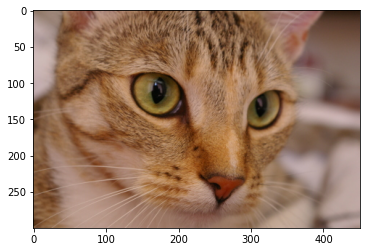

In [16]:
plt.imshow(cat)

In [17]:
sns.heatmap?

uint8


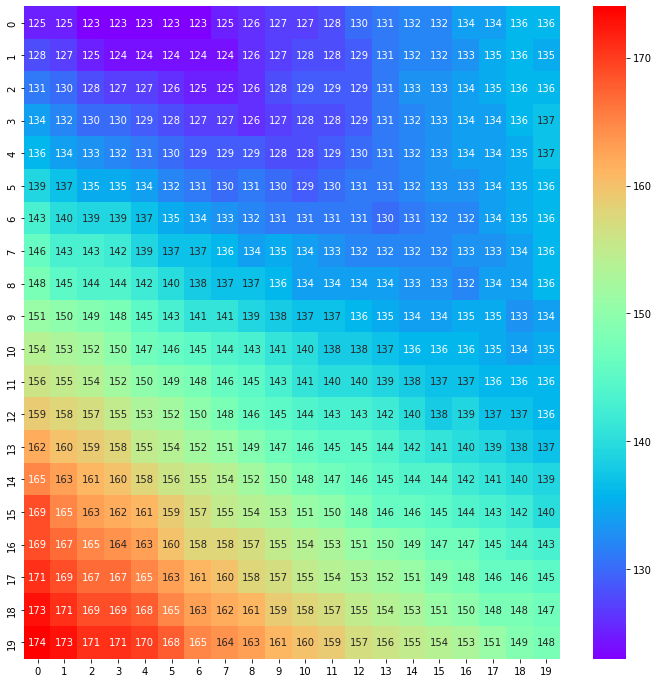

In [29]:
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns

print(gray_cat.dtype)
plt.figure(figsize=(12,12))
sns.heatmap(gray_cat[:20, :20], annot=True, fmt="d", cmap=plt.cm.rainbow)
plt.axis("on")
plt.show()

In [21]:
plt.cm?

In [ ]:
"""
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]
"""

https://matplotlib.org/stable/gallery/color/colormap_reference.html

# RGB

* Gray scale에서 pixel이 scalar를 값으로 가지는 것과 달라, vector를 값으로 가짐.
* Vector의 element 수를 흔히 channel수라고 부름.

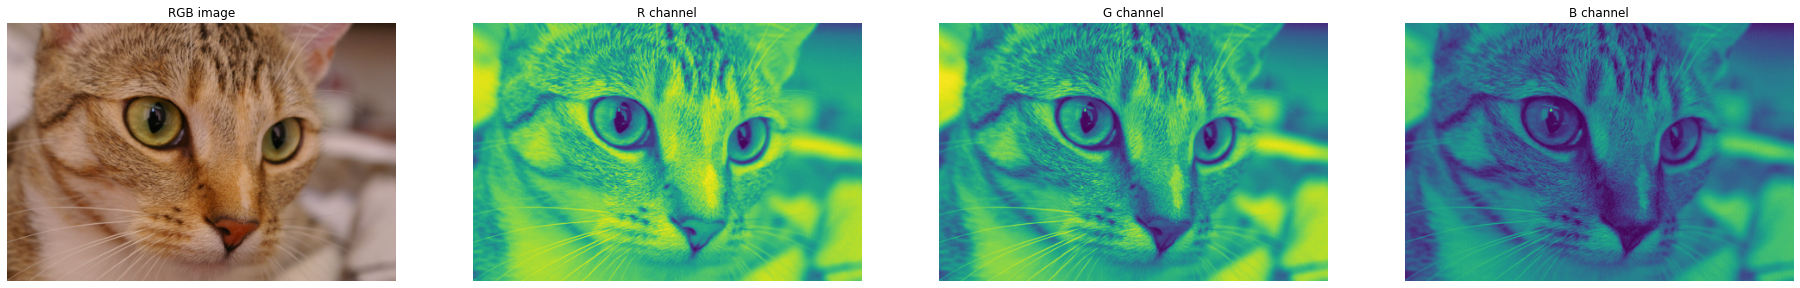

In [33]:
plt.figure(figsize=(32, 8))

plt.subplot(141)
plt.imshow(cat[..., :])
plt.axis("off")
plt.title("RGB image")

plt.subplot(142)
plt.imshow(cat[..., 0])#, cmap=plt.cm.bone)
plt.axis("off")
plt.title("R channel")

plt.subplot(143)
plt.imshow(cat[..., 1])#, cmap=plt.cm.bone)
plt.axis("off")
plt.title("G channel")

plt.subplot(144)
plt.imshow(cat[..., 2])#, cmap=plt.cm.bone)
plt.axis("off")
plt.title("B channel")

plt.show()

# HSV

## H : Hue, Color 색상
* 빛의 파장의 길이에 의해 결정됨.
* 빨강은 0도, 초록은 120도, 파랑색은 240도
  * 0° ~ 360°
  
## S : Saturation (채도 : 색상의 탁하고 맑음의 정도) 
* 예 : 붉은 색이 핑크색이 되는 과정
* 순수한(맑은) 색(붉은색)의 경우 saturation이 높고, 핑크(백색에 의해 희석되기시작)를 거친후 결국 회색(완전히 희석됨)이 됨.
* Saturation이 낮을수록 컬러는(Intensity에 따라) 흰색/회색/검정색이 됨
  * 0% ~ 100% ( or 0~1)
  
## V 또는 I : Value or Intensity, 명도 (밝기의 정도,Brightness) 
* 빛의 진폭에 의해 결정됨. 진폭이 크면 밝기가 커짐.
  * 0% ~ 100% (or 0-1) → 0 검은색, 1:밝은 색



In [65]:
import numpy as np
from matplotlib.colors import hsv_to_rgb


# j = 몇등분할거냐. 360j = 360등분

H, V = np.mgrid[0:1:360j, 0:1:100j]
S = np.ones_like(V)


print("Hue H's size :",H.shape)
print("Saturation S's size :",S.shape)
print("Intensity V's size :",V.shape)

HSV_S100 = np.dstack((H, S * 1.0, V)) # depth 방향으로 배열을 합침. 가장 안쪽의 원소가 합쳐짐.
HSV_S20  = np.dstack((H, S * 0.2, V))

RGB_S100 = hsv_to_rgb(HSV_S100)
RGB_S20  = hsv_to_rgb(HSV_S20)

print("HSV_S20's shape:",HSV_S20.shape)


Hue H's size : (360, 100)
Saturation S's size : (360, 100)
Intensity V's size : (360, 100)
HSV_S20's shape: (360, 100, 3)


In [51]:
Y = np.mgrid[0:1:5j, 0:1:5j, 0:1:5j]

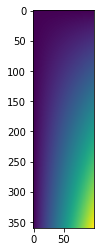

In [44]:
plt.imshow(H*V)

In [35]:
# practice
import numpy as np
from matplotlib.colors import hsv_to_rgb

H, V = np.mgrid[0:1:360j, 0:1:100j]
S = np.ones_like(H)

print(H.shape)
print(S.shape)
print(V.shape)

(360, 100)
(360, 100)
(360, 100)


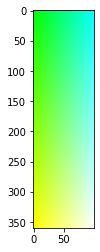

In [73]:
plt.imshow(HSV_S100)

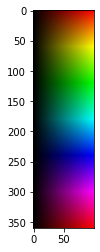

In [74]:
plt.imshow(RGB_S100)

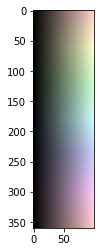

In [75]:
plt.imshow(RGB_S20)

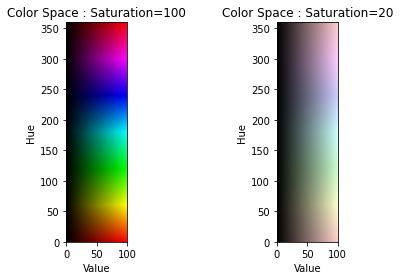

In [39]:
plt.subplot(121)
plt.imshow(RGB_S100,origin="higher",extent=[0,100,0,360])
plt.ylabel("Hue")
plt.xlabel("Value")
plt.title("Color Space : Saturation=100")
plt.grid(False)

plt.subplot(122)
plt.imshow(RGB_S20, origin="higher",extent=[0,100,0,360])
plt.ylabel("Hue")
plt.xlabel("Value")
plt.title("Color Space : Saturation=20")
plt.grid(False)

plt.tight_layout()
plt.show()

# ======================

In [54]:
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)

In [55]:
XX, YY = np.meshgrid(X, Y)
RR = np.sqrt(XX**2 + YY**2)
ZZ = np.sin(RR)

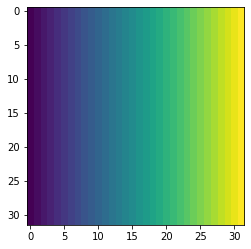

In [60]:
plt.imshow(XX)

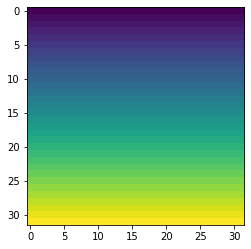

In [61]:
plt.imshow(YY)

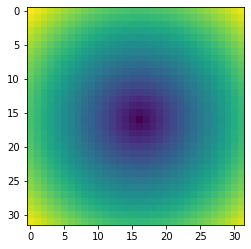

In [62]:
plt.imshow(RR)

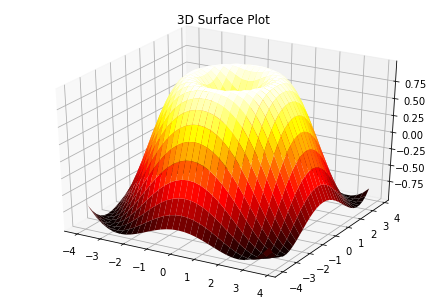

In [63]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("3D Surface Plot")
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot')
plt.show()